In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\Abhinav R\\datasets\\Attrition_EDA_TOH.csv'
data = pd.read_csv(path, index_col=0)

In [3]:
len(data.index)

1237

In [4]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,1,0,1
1,0,49,279,8,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,1,37,1373,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,1,0,1
3,0,33,1392,3,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,1,1,0
4,0,27,591,2,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


In [5]:
len(data.columns)

38

In [6]:
data.dtypes

Attrition                            int64
Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsWithCurrManager                 int64
Department_Research & Development    int64
Department_Sales                     int64
EducationField_Life Sciences         int64
EducationField_Marketing             int64
EducationField_Medical               int64
EducationFi

In [7]:
X = data.drop('Attrition',axis=1).values
y = data['Attrition']

print(X.shape)
print(y.shape)

(1237, 37)
(1237,)


In [8]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
print(X)

[[ 0.69476048  0.73771557 -1.02519321 ...  1.60795126 -0.90209921
   1.41507144]
 [ 1.647817   -1.30791857 -0.15351725 ... -0.6219094   1.10852552
  -0.7066781 ]
 [ 0.21823222  1.41130834 -0.90066807 ...  1.60795126 -0.90209921
   1.41507144]
 ...
 [-0.97308842 -1.61613076 -0.6516178  ...  1.60795126  1.10852552
  -0.7066781 ]
 [ 1.647817    0.54135458 -0.90066807 ... -0.6219094   1.10852552
  -0.7066781 ]
 [-0.13916397 -0.44045039 -0.15351725 ... -0.6219094   1.10852552
  -0.7066781 ]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(865, 37)
(372, 37)
(865,)
(372,)


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [12]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
fold = KFold(n_splits=10, shuffle=True, random_state=10)

In [14]:
accuracies = cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=fold)
print(accuracies)

print(np.mean(accuracies))

[0.86206897 0.86206897 0.96551724 0.89655172 0.82758621 0.88372093
 0.88372093 0.88372093 0.84883721 0.87209302]
0.878588612670409


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [15]:
y_train_pred = logreg.predict(X_train)
y_train_pred.shape

print(accuracy_score(y_train, y_train_pred, normalize=True, sample_weight=None))

print(classification_report(y_train, y_train_pred))

print(confusion_matrix(y_train, y_train_pred))

0.8901734104046243
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       716
           1       0.76      0.52      0.62       149

   micro avg       0.89      0.89      0.89       865
   macro avg       0.84      0.74      0.78       865
weighted avg       0.88      0.89      0.88       865

[[692  24]
 [ 71  78]]


In [16]:


y_test_pred = logreg.predict(X_test)
y_test_pred.shape

print(accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

0.8467741935483871
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       299
           1       0.66      0.45      0.54        73

   micro avg       0.85      0.85      0.85       372
   macro avg       0.77      0.70      0.72       372
weighted avg       0.83      0.85      0.84       372

[[282  17]
 [ 40  33]]


# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 


In [18]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [19]:
y_test_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_test_pred))
print("Test accuracy: \n",knn.score(X_test,y_test))

0.8118279569892473
Test accuracy: 
 0.8118279569892473


In [20]:
y_train_pred=knn.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_pred))
print("Train accuracy :\n",knn.score(X_train,y_train))

0.8508670520231214
Train accuracy :
 0.8508670520231214


In [21]:
#perform k-fold cross validation with n_splits=6

folds = KFold(n_splits=6,shuffle=True,random_state=10)

scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=folds)

print(scores)
np.mean(scores)

[0.82758621 0.85416667 0.84027778 0.83333333 0.82638889 0.82638889]


0.8346902937420179

In [22]:
neighbors = np.arange(1, 9)

#empty arrays to hold train & test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

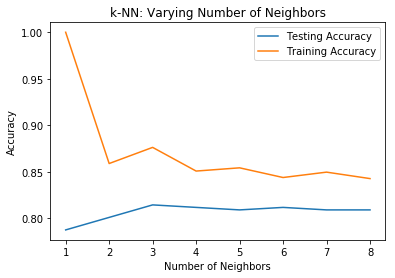

In [23]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) 
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('kNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
training_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

folds = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=folds)


print(training_score)
print(np.mean(scores))
print(test_score)

0.8508670520231214
0.8323699421965317
0.8118279569892473


# Naive Bayes

In [25]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

In [26]:
# calculate different scores

from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1_score : ",metrics.f1_score(y_test,y_pred))

#Write the code to print classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

Accuracy :  0.3010752688172043
Precision :  0.21406727828746178
Recall :  0.958904109589041
f1_score :  0.35
              precision    recall  f1-score   support

           0       0.93      0.14      0.24       299
           1       0.21      0.96      0.35        73

   micro avg       0.30      0.30      0.30       372
   macro avg       0.57      0.55      0.30       372
weighted avg       0.79      0.30      0.26       372



In [27]:

from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()


bnb.fit(X_train,y_train)


Y_pred_bnb = bnb.predict(X_test)



from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,Y_pred_bnb))
print("Precision : ",metrics.precision_score(y_test,Y_pred_bnb))
print("Recall : ",metrics.recall_score(y_test,Y_pred_bnb))
print("f1_score : ",metrics.f1_score(y_test,Y_pred_bnb))



from sklearn.metrics import classification_report

print(classification_report(y_test,Y_pred_bnb))

Accuracy :  0.8413978494623656
Precision :  0.6166666666666667
Recall :  0.5068493150684932
f1_score :  0.5563909774436091
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       299
           1       0.62      0.51      0.56        73

   micro avg       0.84      0.84      0.84       372
   macro avg       0.75      0.71      0.73       372
weighted avg       0.83      0.84      0.84       372



# Trees

# Decision trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# settings for decision tree
# max_depth: The max depth of the tree
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_leaf_nodes: Grow trees upto ``max_leaf_nodes`` should be even
# max_depth = 3, min_samples_leaf = 8, max_leaf_nodes =  10

tree_mod1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 8,
                                   max_leaf_nodes =  10).fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on training set:',tree_mod1.score(X_train, y_train))
print('Accuracy of Decision Tree Classifier on test set:',format(tree_mod1.score(X_test, y_test)))



Accuracy of Decision Tree Classifier on training set: 0.8682080924855491
Accuracy of Decision Tree Classifier on test set: 0.8118279569892473


In [31]:
tree_mod2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4,
                                   max_leaf_nodes =  4).fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on training set:',tree_mod2.score(X_train, y_train))
print('Accuracy of Decision Tree Classifier on test set:',format(tree_mod2.score(X_test, y_test)))


Accuracy of Decision Tree Classifier on training set: 0.8543352601156069
Accuracy of Decision Tree Classifier on test set: 0.8118279569892473


In [32]:
tree_mod2.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Bagging

In [ ]:
# random forest

# n_estimators = no of trees

# max_features : int, float, string, None, optional (default="auto")

#    The number of features to consider when looking for the best split:

#    - If int, then consider `max_features` features at each split.
#    - If float, then `max_features` is a percentage and
#      `int(max_features * n_features)` features are considered at each split.
#    - If "auto", then `max_features=sqrt(n_features)`.
#    - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
#    - If "log2", then `max_features=log2(n_features)`.
#    - If None, then `max_features=n_features
# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.


# For Bagging: max_features = None (= n_features)


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:


bag_mod = RandomForestClassifier(bootstrap = True, n_estimators = 50,
                                random_state = 0,
                                max_features = None, min_samples_leaf = 5,
                                max_depth = 4, oob_score = True).fit(X_train, y_train)

print('Accuracy of Bagging classifier on training set:',bag_mod.score(X_train, y_train))
print('Accuracy of Bagging classifier on test set:',bag_mod.score(X_test, y_test))
print('Accuracy of OOB classifier on test set: ',bag_mod.oob_score_)


Accuracy of Bagging classifier on training set: 0.8751445086705202
Accuracy of Bagging classifier on test set: 0.8252688172043011
Accuracy of OOB classifier on test set:  0.8485549132947977


In [35]:
bag_mod1 = RandomForestClassifier(bootstrap = True, n_estimators = 50,
                                random_state = 0,
                                max_features = None, min_samples_leaf = 4,
                                max_depth = 3, oob_score = True).fit(X_train, y_train)

print('Accuracy of Bagging classifier on training set:',bag_mod1.score(X_train, y_train))
print('Accuracy of Bagging classifier on test set:',bag_mod1.score(X_test, y_test))
print('Accuracy of OOB classifier on test set: ',bag_mod1.oob_score_)


Accuracy of Bagging classifier on training set: 0.8635838150289017
Accuracy of Bagging classifier on test set: 0.8118279569892473
Accuracy of OOB classifier on test set:  0.8497109826589595


# Random Forest

In [36]:
rf_mod = RandomForestClassifier(bootstrap = True, n_estimators = 50,
                                random_state = 0,
                                max_features = "sqrt", min_samples_leaf = 5,
                                max_depth = 7, oob_score = True).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.4f}'
        .format(rf_mod.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.4f}'
        .format(rf_mod.score(X_test, y_test)))
print('Accuracy of RF OOB classifier on test set: {:.4f}'
        .format(rf_mod.oob_score_))


Accuracy of RF classifier on training set: 0.8775
Accuracy of RF classifier on test set: 0.8145
Accuracy of RF OOB classifier on test set: 0.8405


# Gradient boosted decision trees

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
boost_mod = GradientBoostingClassifier(n_estimators = 220, max_depth = 2,
                                      learning_rate=0.01,
                                      random_state = 0).fit(X_train, y_train)
print('Accuracy of Boosting classifier on training set: {:.4f}'
        .format(boost_mod.score(X_train, y_train)))
print('Accuracy of Boosting classifier on test set: {:.4f}'
        .format(boost_mod.score(X_test, y_test)))

Accuracy of Boosting classifier on training set: 0.8578
Accuracy of Boosting classifier on test set: 0.8145
